/home/justin/.cache/matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /tmp/matplotlib-i0hfos_d because there was an issue with the default path (/home/justin/.cache/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


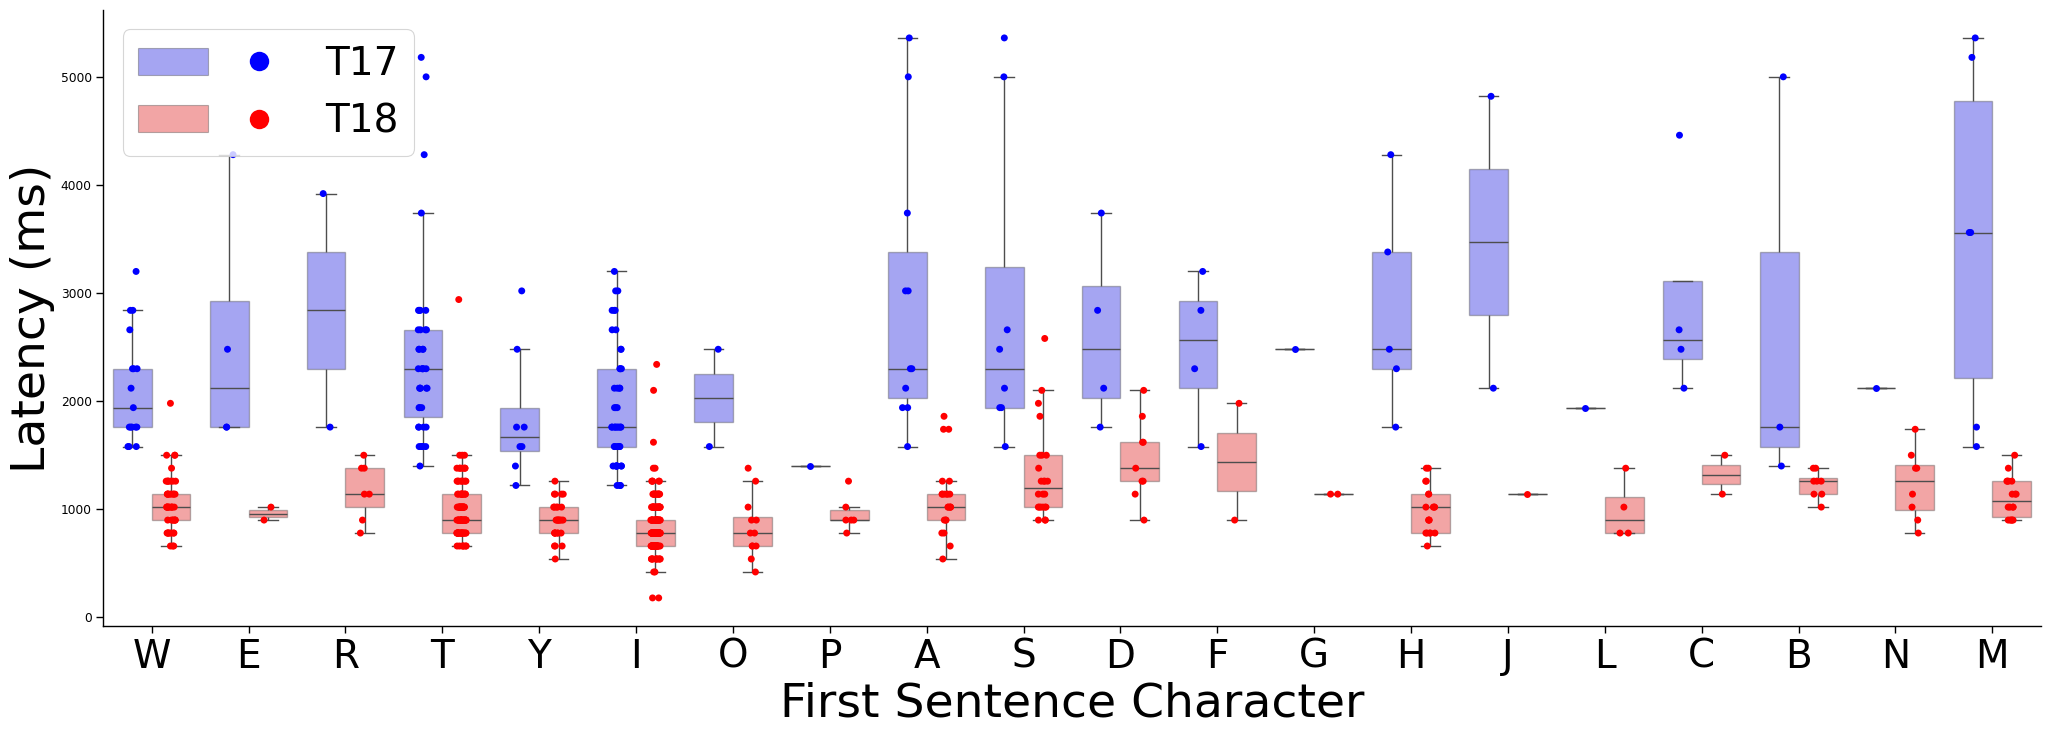

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.legend_handler import HandlerTuple

data_frame = []
plt.rcParams["figure.figsize"] = (25 ,8)
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":34, 'legend.fontsize': 28, 'lines.markersize':9})

with open('t18_latencies.pkl', 'rb') as f:
    t18_latencies = pickle.load(f)

with open('t17_latencies.pkl', 'rb') as f:
    t17_latencies = pickle.load(f)
    
keyboard = ['Q','W', 'E', 'R', 'T','Y', 'U', 'I', 'O', 'P',
             'A', 'S', 'D', 'F', 'G','H', 'J', 'K', 'L', '?',
             'Z', 'X', 'C', 'V', 'B','Sp', 'N', 'M', ',', '.']

i = 0
all_t17_latencies = []
for letter in keyboard:
    if letter in t17_latencies:
        for l in t17_latencies[letter]:
            data_frame.append([letter, 'T17', l])
            all_t17_latencies.append(l)
            i+=1


i = 0
all_t18_latencies = []
for letter in keyboard:
    if letter in t18_latencies:
        for l in t18_latencies[letter]:
            data_frame.append([letter, 'T18', l])
            all_t18_latencies.append(l)
            i+=1

new_order = []
significanceComparisons = []
for k in keyboard:
    if k in t17_latencies and k in t18_latencies:
        significanceComparisons.append(((k, 'T17'), (k, 'T18')))
        new_order.append(k)

df = pd.DataFrame(data_frame, columns=['First Sentence Character', 'Participant', 'Latency (ms)'])
flatui = ['blue', 'red']
sns.set_palette(flatui)
g1 = sns.boxplot(x='First Sentence Character', y='Latency (ms)', hue='Participant', data=df, boxprops={'alpha': 0.4},showfliers=False,order=new_order)
g2 = sns.stripplot(x='First Sentence Character', y='Latency (ms)', hue='Participant', data=df, dodge=True, ax = g1,size=5,order=new_order)
sns.despine()
plt.gca().legend().set_title('')

fig_args = {'x': 'First Sentence Character',
            'y': 'Latency (ms)',
            'hue':'Participant',
            'data': df,
            'order':  new_order,
            'hue_order':['T17','T18'],
            'dodge': True}

configuration = {'test':'t-test_welch',
                 'comparisons_correction':None,
                 'text_format':'star'}



plt.legend(frameon=False)

g1.yaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.xticks(fontsize=28)

handles, labels = g1.get_legend_handles_labels()
handles[2].set_markersize(14)
handles[3].set_markersize(14)
g1.legend(handles=[(handles[0], handles[2]), (handles[1], handles[3])],
          labels=['T17', 'T18'],
          loc='upper left', handlelength=4,
          handler_map={tuple: HandlerTuple(ndivide=None)})
plt.savefig('T18T17latencies.pdf', bbox_inches='tight')
plt.show()

In [4]:
import scipy.stats as stats
stats.ttest_ind(all_t17_latencies, all_t18_latencies, equal_var = False)

TtestResult(statistic=18.69478645911167, pvalue=4.511936316044612e-44, df=180.38493990935646)